In [2]:
# Bias-Variance Trade-off : balance between bias and variance so that a model generalize well.
# bias: inability of a model to capture relationship within training data.
# variance: differ in model prediction when trained on different subset of same training data.
# Commonly used techniques: Regularization, Bagging & boosting, Cross-validation, Complexity Control etc.

In [4]:
# Regularization: Primarily aimed at reducing Variance to prevent overfitting. It involves adding penalty to model complexity 
# Generally decrease variance but slightly increase bias and prevent overfitting to some extent
# Types: Ridge regularization(L2), Lasso Regularization(L1), Elastic net

In [ ]:
# Ridge Regularization on simple Linear Regression : 

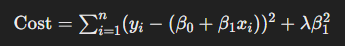

In [41]:
from IPython.display import Image
Image(filename='images/Ridge Regression.png')

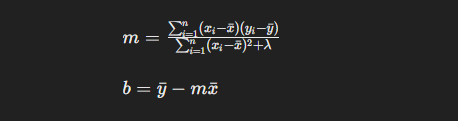

In [42]:
Image(filename='images/m and b.png')

In [7]:
# This is cost function for Ridge Regression . Here alpha (λ) is non-negative hyperparameter that controls the strength of the penalty.
# β0 is intercept and β1 is slope

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) 

In [29]:
#                                Custom Class For Ridge Regression (single feature) 
class RidgeRegression:
    
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m, self.b)
    
    def predict(X_test):
        pass

In [38]:
print('Coefficient     Intercept')
srr = RidgeRegression()
srr.fit(X_train, y_train)

srr1 = RidgeRegression(alpha=10)
srr1.fit(X_train, y_train)

srr2 = RidgeRegression(alpha=100)
srr2.fit(X_train, y_train)

Coefficient     Intercept
[28.12380711] [-2.71209189]
[24.63922736] [-2.62715536]
[11.58742415] [-2.30901805]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

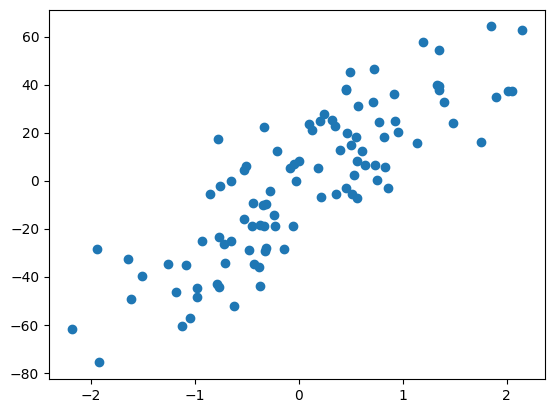

In [10]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print('coefficient:',lr.coef_)
print('intercept',lr.intercept_)


# Ridge Regularization 
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print('coefficient:',rr.coef_)
print('intercept',rr.intercept_)

coefficient: [27.82809103]
intercept -2.29474455867698
coefficient: [24.9546267]
intercept -2.1269130035235735


[24.9546267]
-2.1269130035235735
[12.93442104]
-1.4248441496033308


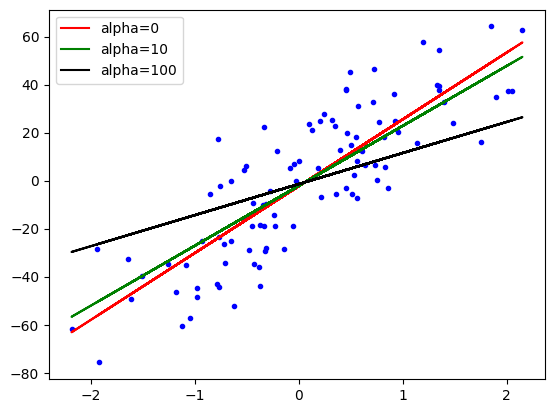

In [19]:
# How hyperparameter alpha (λ) affect regression line 
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='black',label='alpha=100')
plt.legend()

In [1]:
#             Implementation of Ridge Regression for n Dimensional Data From Scratch

# Mathematically, a new hyperparamter (alpha) is added (2D data) to denomenator of slope which reduces slope .
# Decrease in slope means target variable is less dependent on input features. Thus reduces Overfitting

In [6]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [12]:
#                                                Custom Class For Ridge Regression
class RidgeRegression:
    
    def __init__(self, alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        
        X_train = np.insert(X_train, 0, 1, axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [14]:
rr = RidgeRegression()
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)
print('r2_score:',r2_score(y_test, y_pred))
print('Coefficients:',rr.coef_)
print('Intercept:',rr.intercept_)

r2_score: 0.4693128853309805
Coefficients: [  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
Intercept: 150.8905342560281
